<a href="https://colab.research.google.com/github/shyamams10/Drug/blob/main/Drug_side_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the necessary libraries**

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the data file to Python enviornment**

In [95]:
df=pd.read_csv('/content/drive/MyDrive/webmd.csv',encoding="latin-1")

In [96]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


**Dataset understanding**

In [97]:
##Get number of Rows and columns of dataset
df.shape

(362806, 12)

In [98]:
##Getting the concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [99]:
#Count number of distinct elements in columns
df.nunique()

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

In [100]:
##Finding missing values
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [101]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

**Taking only necessary columns**

In [102]:
df1= df.drop(['Date','DrugId','EaseofUse', 'Reviews','Satisfaction','UsefulCount'], axis=1)

In [103]:
df1.head()

,Age,Condition,Drug,Effectiveness,Sex,Sides
0,75 or over,Stuffy Nose,25dph-7.5peh,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,25-34,Cold Symptoms,25dph-7.5peh,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,65-74,Other,warfarin (bulk) 100 % powder,3,Female,
3,75 or over,Other,warfarin (bulk) 100 % powder,2,Female,
4,35-44,Other,warfarin (bulk) 100 % powder,1,Male,


In [104]:
df1.shape

(362806, 6)

In [105]:
df1.isna().sum()

Age              0
Condition        0
Drug             0
Effectiveness    0
Sex              0
Sides            0
dtype: int64

In [106]:
##To check the data type of new columns
df1.dtypes

Age              object
Condition        object
Drug             object
Effectiveness     int64
Sex              object
Sides            object
dtype: object

**Seperating Side effect column**

In [107]:
df1['Sides']

0         Drowsiness,  dizziness ,  dry mouth /nose/thro...
1         Drowsiness,  dizziness ,  dry mouth /nose/thro...
2                                                          
3                                                          
4                                                          
                                ...                        
362801    Nausea ,  headache ,  vomiting , drowsiness, g...
362802    Nausea ,  headache ,  vomiting , drowsiness, g...
362803    Nausea ,  headache ,  vomiting , drowsiness, g...
362804    Nausea ,  headache ,  vomiting , drowsiness, g...
362805    Nausea ,  headache ,  vomiting , drowsiness, g...
Name: Sides, Length: 362806, dtype: object

**Splitting the side effect column to different columns**

In [108]:
df2=df['Sides'].str.split(',', expand=True)

In [109]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Drowsiness,dizziness,dry mouth /nose/throat,headache,upset stomach,constipation,or trouble sleeping may occur.,None,None,None,None,None,None,None,None,None,None
1,Drowsiness,dizziness,dry mouth /nose/throat,headache,upset stomach,constipation,or trouble sleeping may occur.,None,None,None,None,None,None,None,None,None,None
2,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,Nausea,headache,vomiting,drowsiness,gas,constipation,trouble sleeping,unusual dreams,or changes in taste may occur.,None,None,None,None,None,None,None,None
362802,Nausea,headache,vomiting,drowsiness,gas,constipation,trouble sleeping,unusual dreams,or changes in taste may occur.,None,None,None,None,None,None,None,None
362803,Nausea,headache,vomiting,drowsiness,gas,constipation,trouble sleeping,unusual dreams,or changes in taste may occur.,None,None,None,None,None,None,None,None
362804,Nausea,headache,vomiting,drowsiness,gas,constipation,trouble sleeping,unusual dreams,or changes in taste may occur.,None,None,None,None,None,None,None,None


In [110]:
# adding column name to the respective columns
df2.columns =['Side effect1','Side effect2','Side effect3','Side effect4','Side effect5','Side effect6','Side effect7','Side effect8','Side effect9','Side effect10','Side effect11','Side effect12','Side effect13','Side effect14','Side effect15','Side effect16','Side effect17']

In [111]:
df2.tail()

,Side effect1,Side effect2,Side effect3,Side effect4,Side effect5,Side effect6,Side effect7,Side effect8,Side effect9,Side effect10,Side effect11,Side effect12,Side effect13,Side effect14,Side effect15,Side effect16,Side effect17
362801,Nausea,headache,vomiting,drowsiness,gas,constipation,trouble sleeping,unusual dreams,or changes in taste may occur.,None,None,None,None,None,None,None,None
362802,Nausea,headache,vomiting,drowsiness,gas,constipation,trouble sleeping,unusual dreams,or changes in taste may occur.,None,None,None,None,None,None,None,None
362803,Nausea,headache,vomiting,drowsiness,gas,constipation,trouble sleeping,unusual dreams,or changes in taste may occur.,None,None,None,None,None,None,None,None
362804,Nausea,headache,vomiting,drowsiness,gas,constipation,trouble sleeping,unusual dreams,or changes in taste may occur.,None,None,None,None,None,None,None,None
362805,Nausea,headache,vomiting,drowsiness,gas,constipation,trouble sleeping,unusual dreams,or changes in taste may occur.,None,None,None,None,None,None,None,None


In [112]:
df2['Side effect1'].value_counts()

Nausea                                                         125023
Drowsiness                                                      44296
Dizziness                                                       42123
                                                                17460
Upset stomach                                                   10079
                                                                ...  
Numbness/tingling                                                   1
Fever or  dizziness  may occur.                                     1
Temporary burning/stinging of the  eye                              1
Pain/redness/warmth/bruising/swelling at the injection site         1
(See also How to Use section). Nausea                               1
Name: Side effect1, Length: 486, dtype: int64

In [113]:
df2['Side effect1'].shape

(362806,)

**Calculating the number of side effects for a drug and attaching the that values to a new column**

In [114]:
test_df=df2.apply(lambda x: x.count(), axis=1)

In [115]:
test_df.head(10)

0    7
1    7
2    1
3    1
4    1
5    1
6    7
7    7
8    7
9    5
dtype: int64

In [116]:
df2['No of Side Effects']=test_df

In [117]:
df2.head()

,Side effect1,Side effect2,Side effect3,Side effect4,Side effect5,Side effect6,Side effect7,Side effect8,Side effect9,Side effect10,Side effect11,Side effect12,Side effect13,Side effect14,Side effect15,Side effect16,Side effect17,No of Side Effects
0,Drowsiness,dizziness,dry mouth /nose/throat,headache,upset stomach,constipation,or trouble sleeping may occur.,None,None,None,None,None,None,None,None,None,None,7
1,Drowsiness,dizziness,dry mouth /nose/throat,headache,upset stomach,constipation,or trouble sleeping may occur.,None,None,None,None,None,None,None,None,None,None,7
2,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
3,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
4,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1


In [118]:
df2['No of Side Effects']

0         7
1         7
2         1
3         1
4         1
         ..
362801    9
362802    9
362803    9
362804    9
362805    9
Name: No of Side Effects, Length: 362806, dtype: int64

**Seperating the total side effects into 3 catogories**

In [119]:
df2['No of Side Effects'].unique()

array([ 7,  1,  5,  6,  3,  4,  8,  9,  2, 10, 14, 11, 15, 12, 17, 13, 16])

In [120]:
df3=df2['No of Side Effects']

In [121]:
df4=df3.replace(1,'Less no.of side effects')
df5=df4.replace(2,'Less no.of side effects')
df6=df5.replace(3,'Less no.of side effects')
df7=df6.replace(4,'Less no.of side effects')
df8=df7.replace(5,'Less no.of side effects')
df9=df8.replace(6,'Less no.of side effects')
df10=df9.replace(7,'Moderate no.of side effects')
df11=df10.replace(8,'Moderate no.of side effects')
df12=df11.replace(9,'Moderate no.of side effects')
df13=df12.replace(10,'Moderate no.of side effects')
df14=df13.replace(11,'Moderate no.of side effects')
df15=df14.replace(12,'Moderate no.of side effects')
df16=df15.replace(13,'Large no.of side effects')
df17=df16.replace(14,'Large no.of side effects')
df18=df17.replace(15,'Large no.of side effects')
df19=df18.replace(16,'Large no.of side effects')
df20=df19.replace(17,'Large no.of side effects')


In [122]:
df20

0         Moderate no.of side effects
1         Moderate no.of side effects
2             Less no.of side effects
3             Less no.of side effects
4             Less no.of side effects
                     ...             
362801    Moderate no.of side effects
362802    Moderate no.of side effects
362803    Moderate no.of side effects
362804    Moderate no.of side effects
362805    Moderate no.of side effects
Name: No of Side Effects, Length: 362806, dtype: object

In [123]:
df20.tail()

362801    Moderate no.of side effects
362802    Moderate no.of side effects
362803    Moderate no.of side effects
362804    Moderate no.of side effects
362805    Moderate no.of side effects
Name: No of Side Effects, dtype: object

In [124]:
df20.unique()

array(['Moderate no.of side effects', 'Less no.of side effects',
       'Large no.of side effects'], dtype=object)

In [125]:
df20.value_counts()

Less no.of side effects        204764
Moderate no.of side effects    149636
Large no.of side effects         8406
Name: No of Side Effects, dtype: int64

In [126]:
df2.head()

,Side effect1,Side effect2,Side effect3,Side effect4,Side effect5,Side effect6,Side effect7,Side effect8,Side effect9,Side effect10,Side effect11,Side effect12,Side effect13,Side effect14,Side effect15,Side effect16,Side effect17,No of Side Effects
0,Drowsiness,dizziness,dry mouth /nose/throat,headache,upset stomach,constipation,or trouble sleeping may occur.,None,None,None,None,None,None,None,None,None,None,7
1,Drowsiness,dizziness,dry mouth /nose/throat,headache,upset stomach,constipation,or trouble sleeping may occur.,None,None,None,None,None,None,None,None,None,None,7
2,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
3,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
4,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1


In [127]:
df2['Side effect']=df20

In [128]:
df2.head()

,Side effect1,Side effect2,Side effect3,Side effect4,Side effect5,Side effect6,Side effect7,Side effect8,Side effect9,Side effect10,Side effect11,Side effect12,Side effect13,Side effect14,Side effect15,Side effect16,Side effect17,No of Side Effects,Side effect
0,Drowsiness,dizziness,dry mouth /nose/throat,headache,upset stomach,constipation,or trouble sleeping may occur.,None,None,None,None,None,None,None,None,None,None,7,Moderate no.of side effects
1,Drowsiness,dizziness,dry mouth /nose/throat,headache,upset stomach,constipation,or trouble sleeping may occur.,None,None,None,None,None,None,None,None,None,None,7,Moderate no.of side effects
2,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,Less no.of side effects
3,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,Less no.of side effects
4,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,Less no.of side effects


In [129]:
df1['Side Effect']=df2['Side effect']

**Considering the desired data frame for modelling**

In [130]:
df1.head()

,Age,Condition,Drug,Effectiveness,Sex,Sides,Side Effect
0,75 or over,Stuffy Nose,25dph-7.5peh,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",Moderate no.of side effects
1,25-34,Cold Symptoms,25dph-7.5peh,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",Moderate no.of side effects
2,65-74,Other,warfarin (bulk) 100 % powder,3,Female,,Less no.of side effects
3,75 or over,Other,warfarin (bulk) 100 % powder,2,Female,,Less no.of side effects
4,35-44,Other,warfarin (bulk) 100 % powder,1,Male,,Less no.of side effects


**Exploratory data analysis**

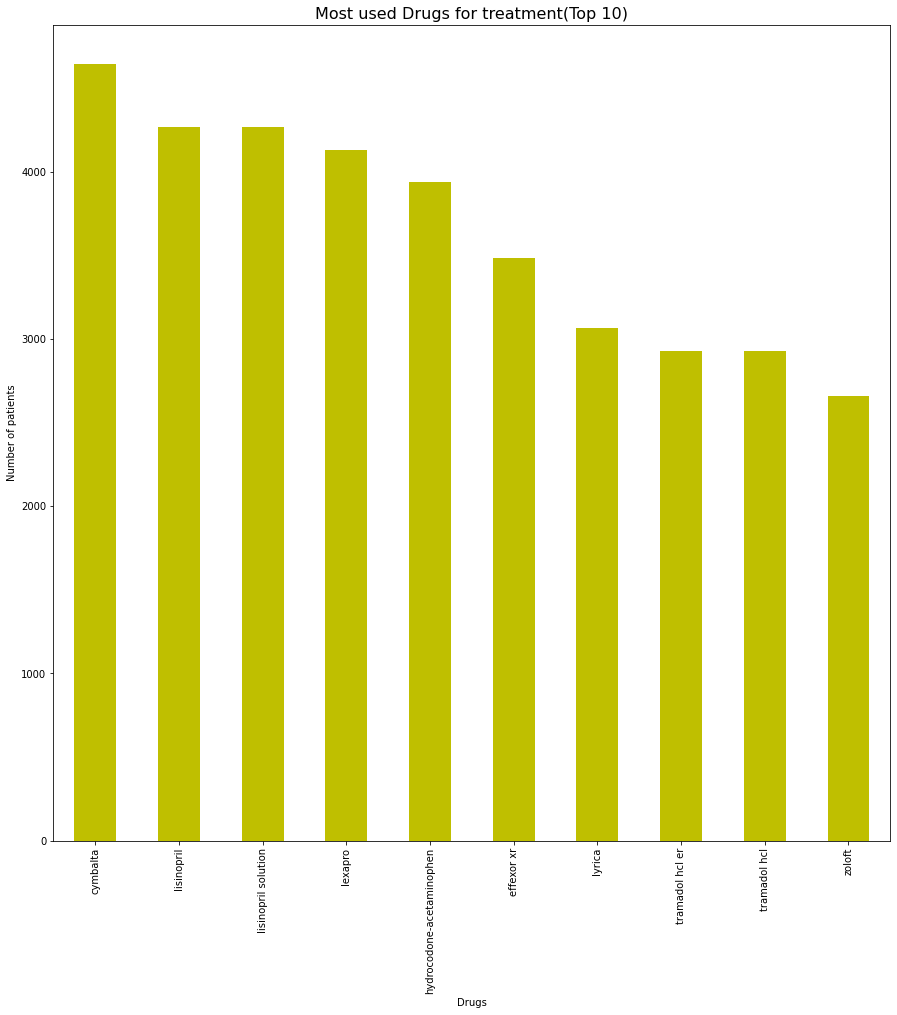

In [131]:
# lets check the list of most used Drugs for treatment (top 10)
df1['Drug'].value_counts().head(10).plot(kind='bar',color='y')
plt.title('Most used Drugs for treatment(Top 10)',fontsize=16)
plt.xlabel("Drugs")
plt.ylabel('Number of patients')
#plt.rcParams['figure.figsize'] = (8,7)
plt.show()

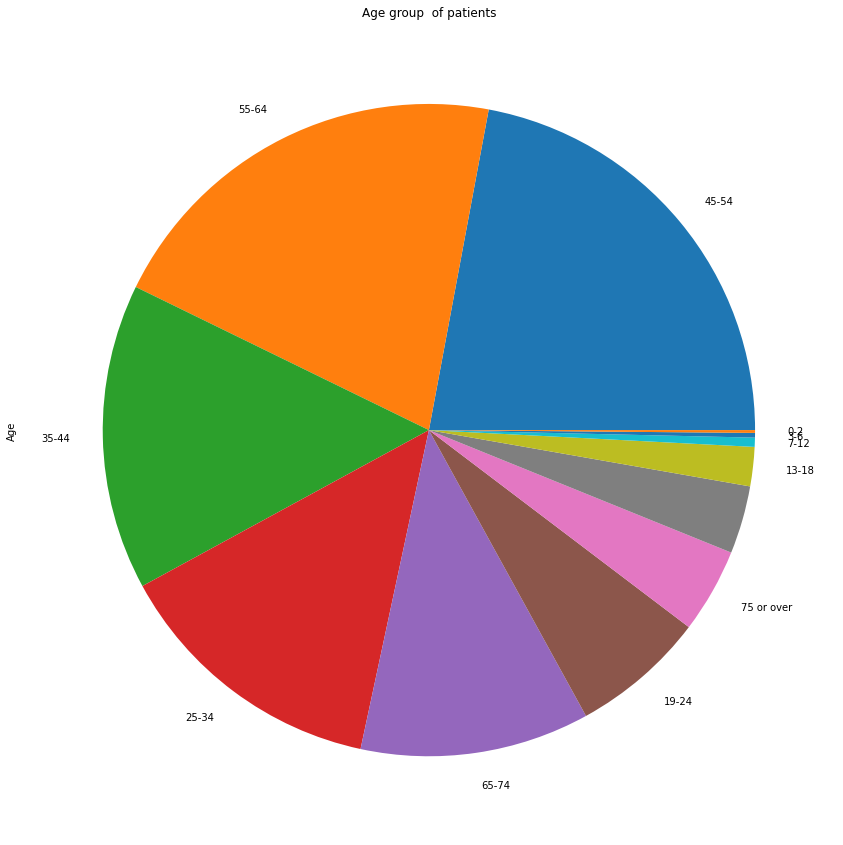

In [132]:
# lets check the Age group  of patients
df1['Age'].value_counts().plot(kind='pie')
plt.title('Age group  of patients')
plt.rcParams['figure.figsize'] = (15,15)
plt.show()

**label encoding**

In [133]:
df1.columns

Index(['Age', 'Condition', 'Drug', 'Effectiveness', 'Sex', 'Sides',
       'Side Effect'],
      dtype='object')

In [134]:
cols = ['Age', 'Condition', 'Drug', 'Effectiveness', 'Sex', 'Sides','Side Effect']

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [136]:
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)

In [137]:
df1.head()

,Age,Condition,Drug,Effectiveness,Sex,Sides,Side Effect
0,11,1596,4,4,2,413,2
1,4,424,4,4,1,413,2
2,9,1184,6866,2,1,0,1
3,11,1184,6866,1,1,0,1
4,6,1184,6866,0,2,0,1


**Seperating the data frame into target and variables**

In [139]:
x=df1.drop(['Side Effect'],axis=1)

In [140]:
x.head()

,Age,Condition,Drug,Effectiveness,Sex,Sides
0,11,1596,4,4,2,413
1,4,424,4,4,1,413
2,9,1184,6866,2,1,0
3,11,1184,6866,1,1,0
4,6,1184,6866,0,2,0


In [141]:
y=df1['Side Effect']

**Split the train and test data**

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

**Modelling**

**1.Logistic Regression**

In [143]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred_log = logistic_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [144]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
print('Accuracy is :',accuracy_score(y_test,y_pred_log)*100)
print('Precision is :',precision_score(y_test,y_pred_log,average='micro'))
print('Recall is :',recall_score(y_test,y_pred_log,average='micro'))
print('f1_score is :',f1_score(y_test,y_pred_log,average='micro'))

Accuracy is : 60.58598702706676
Precision is : 0.6058598702706676
Recall is : 0.6058598702706676
f1_score is : 0.6058598702706676


**2. knn**

In [145]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)
y_pred_knn = classifier.predict(x_test)

In [146]:
print('Accuracy is :',accuracy_score(y_test,y_pred_knn)*100)
print('Precision is :',precision_score(y_test,y_pred_knn,average='micro'))
print('Recall is :',recall_score(y_test,y_pred_knn,average='micro'))
print('f1_score is :',f1_score(y_test,y_pred_knn,average='micro'))

Accuracy is : 98.4482093309568
Precision is : 0.984482093309568
Recall is : 0.984482093309568
f1_score is : 0.984482093309568


**3.RandomForest**

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rand = rf.predict(x_test)

In [148]:
print('Accuracy is :',accuracy_score(y_test,y_pred_rand)*100)
print('Precision is :',precision_score(y_test,y_pred_rand,average='micro'))
print('Recall is :',recall_score(y_test,y_pred_rand,average='micro'))
print('f1_score is :',f1_score(y_test,y_pred_rand,average='micro'))

Accuracy is : 99.40831664247257
Precision is : 0.9940831664247257
Recall is : 0.9940831664247257
f1_score is : 0.9940831664247257


**More Accuracy is for random forest Classifier. So That is the best Model. So that model is used for the prediction**

**Predicting Classification for set of values**

In [149]:
df1.tail()

,Age,Condition,Drug,Effectiveness,Sex,Sides,Side Effect
362801,8,1587,1244,4,1,911,2
362802,0,1184,1244,2,0,911,2
362803,4,1587,1244,3,1,911,2
362804,8,1587,1244,4,2,911,2
362805,7,1587,1244,4,1,911,2


In [153]:
X_new=[[7,1587,1244,4,1,911]]

In [154]:
y_pred_rand = rf.predict(X_new)
output=y_pred_rand.item()
output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


2